## Main program 

In [6]:
# Read data
import h5py
import pandas
import numpy as np
import matplotlib.pyplot as plt

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[0]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')
test  = load_data('test')

In [7]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

In [8]:
x = train[all_variables]
y = train['Truth']

In [9]:
Nbins = 100
xmin = 0.0
xmax = 1.0

In [10]:
# Evaluate data
from scipy.stats import chi2_contingency

chi2_results = {}

for var in all_variables:
    contingency_table = pandas.crosstab(train[var], y)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[var] = {'chi2': chi2, 'p_value': p_value}
    
for var, result in chi2_results.items():
    print(f"Variable: {var}")
    print(f"Chi-square: {result['chi2']}")
    print(f"P-value: {result['p_value']}")
    print()

Variable: actualInteractionsPerCrossing
Chi-square: 107.2864788247978
P-value: 0.004437096300704147

Variable: averageInteractionsPerCrossing
Chi-square: 107.2864788247978
P-value: 0.004437096300704147

Variable: correctedActualMu
Chi-square: 107.2864788247978
P-value: 0.004437096300704147

Variable: correctedAverageMu
Chi-square: 107.2864788247978
P-value: 0.004437096300704147

Variable: correctedScaledActualMu
Chi-square: 107.2864788247978
P-value: 0.004437096300704147

Variable: correctedScaledAverageMu
Chi-square: 107.2864788247978
P-value: 0.004437096300704147

Variable: NvtxReco
Chi-square: 87.77637369351868
P-value: 0.0010456909504059342

Variable: p_nTracks
Chi-square: 20768.109254242696
P-value: 0.0

Variable: p_pt_track
Chi-square: 162139.57042334514
P-value: 0.3526952254003026

Variable: p_eta
Chi-square: 159731.84784694124
P-value: 0.5278462012488895

Variable: p_phi
Chi-square: 162195.2249903286
P-value: 0.5063795935332498

Variable: p_charge
Chi-square: 59.40259385304175


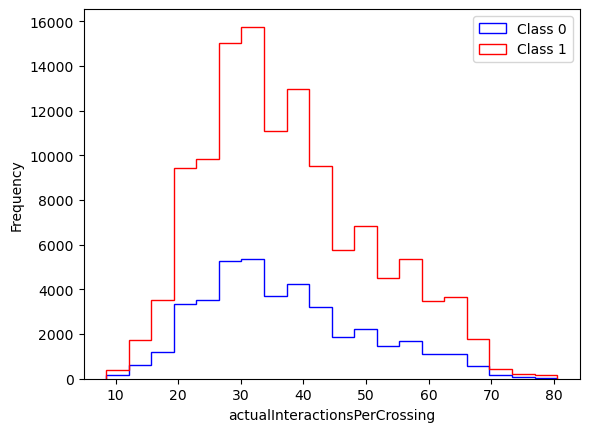

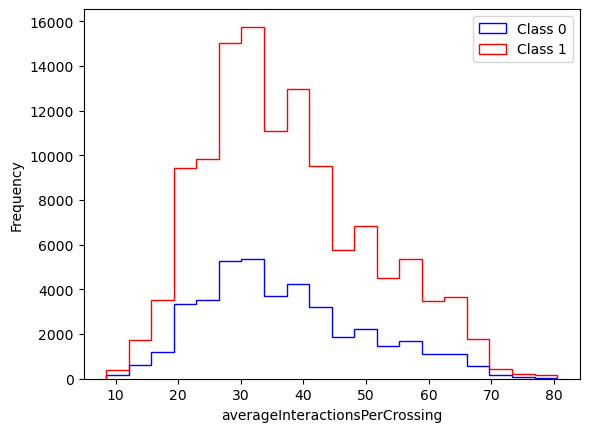

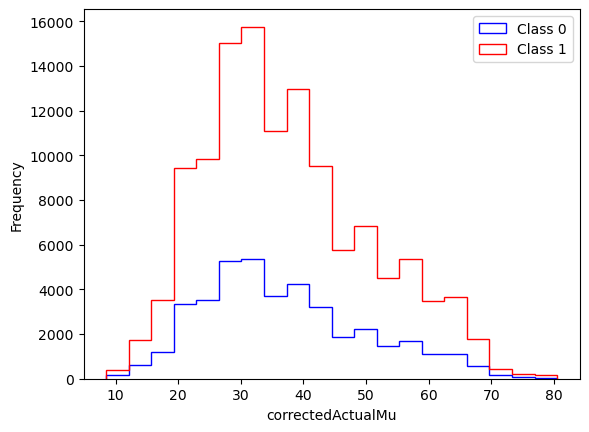

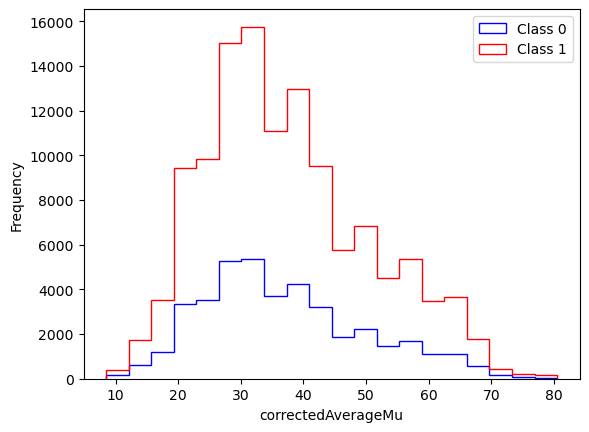

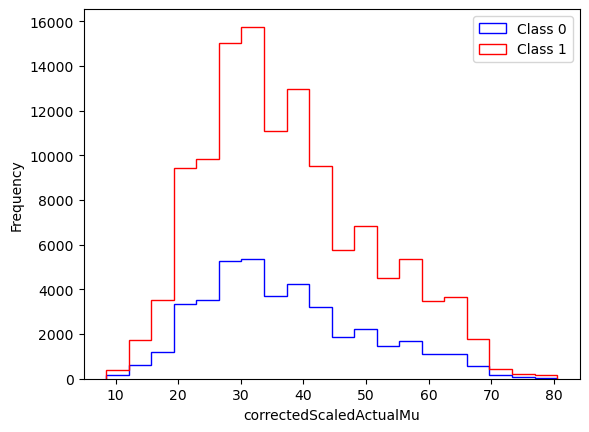

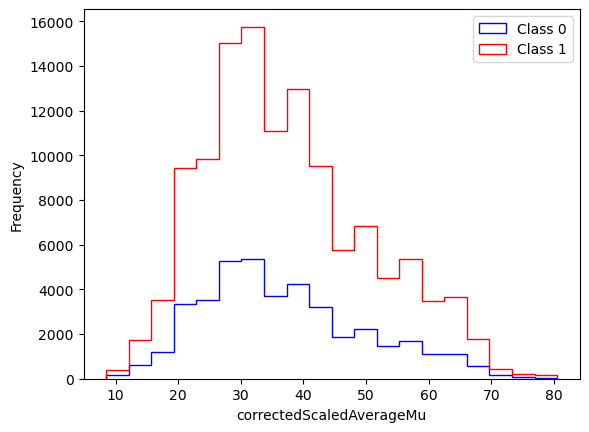

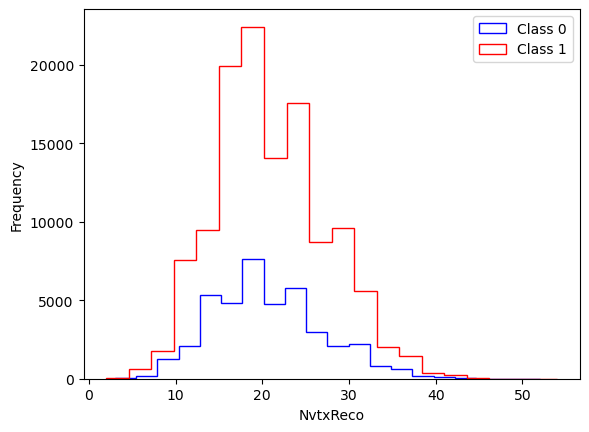

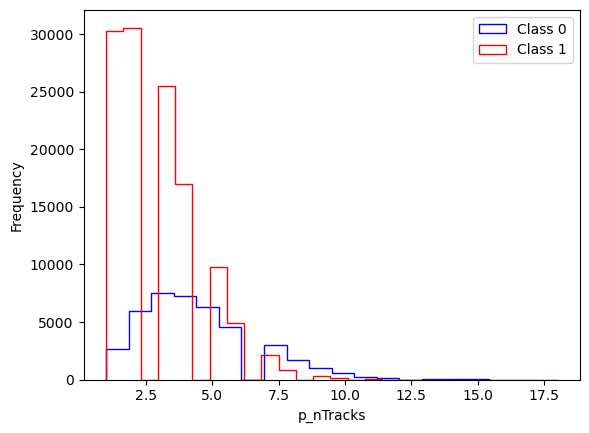

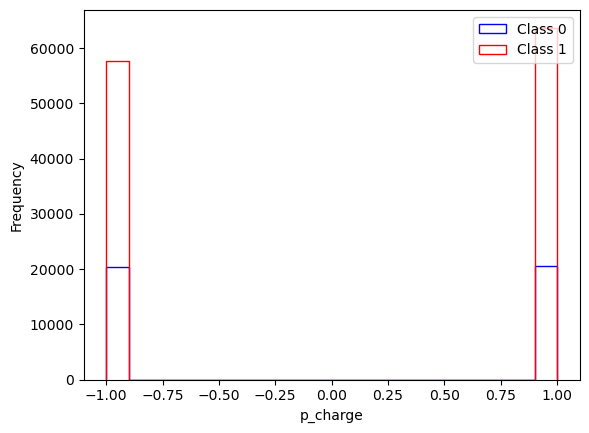

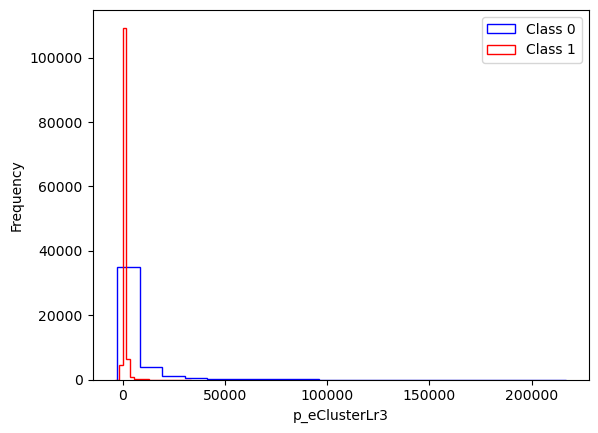

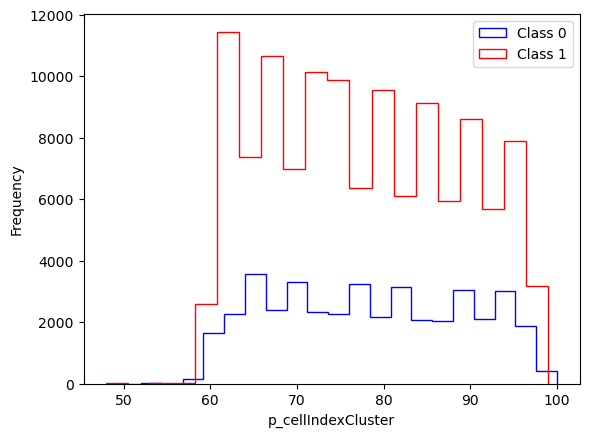

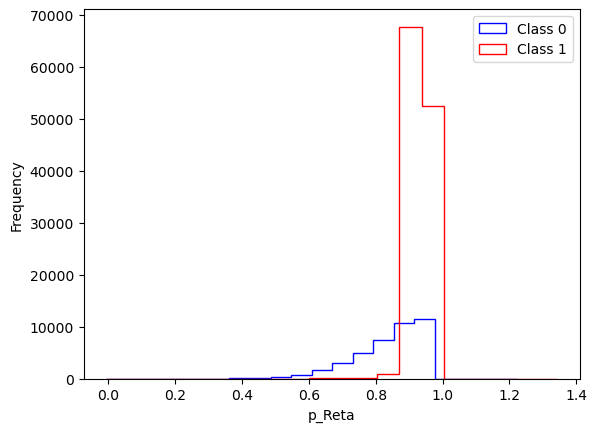

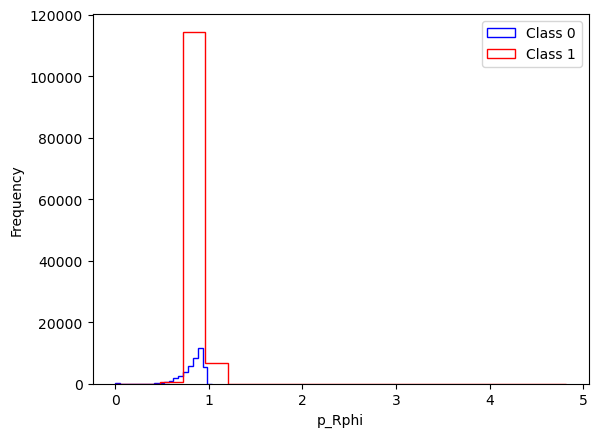

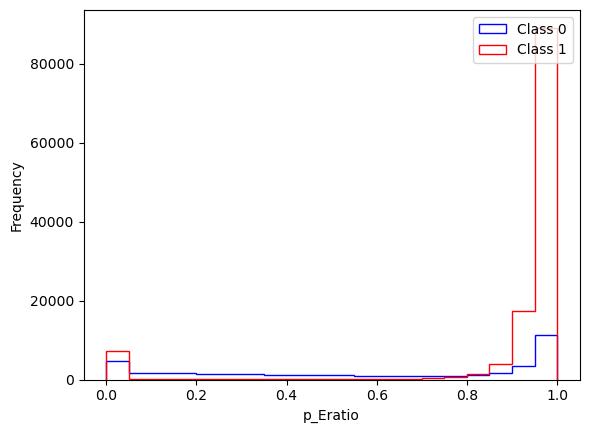

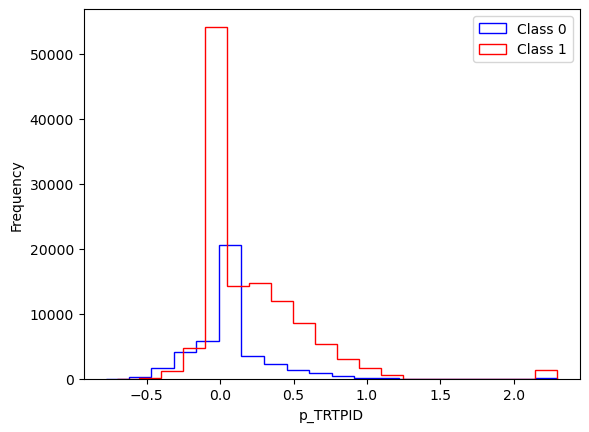

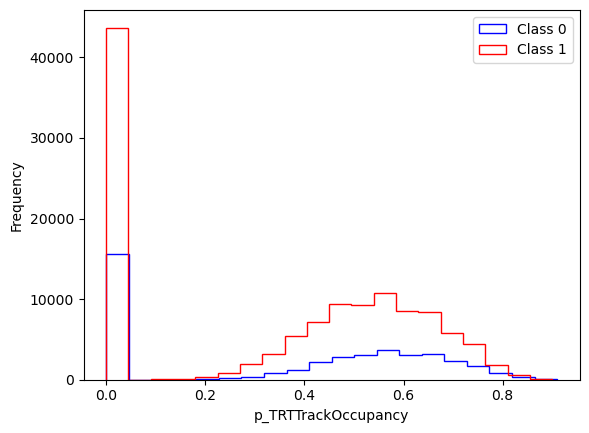

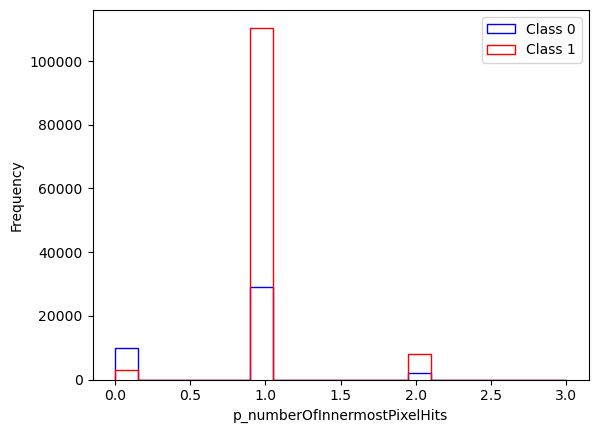

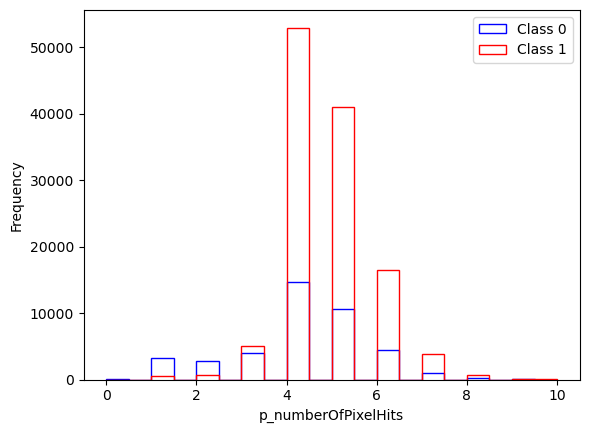

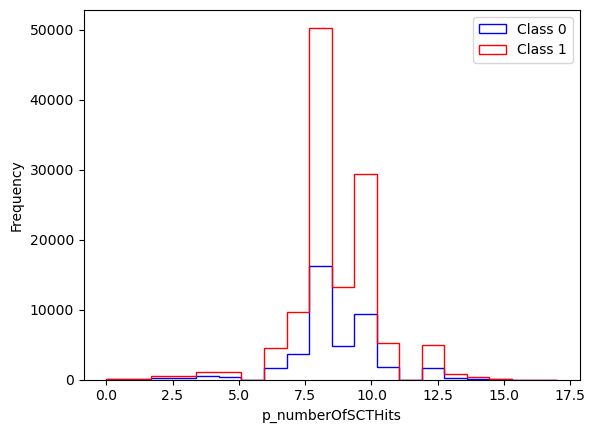

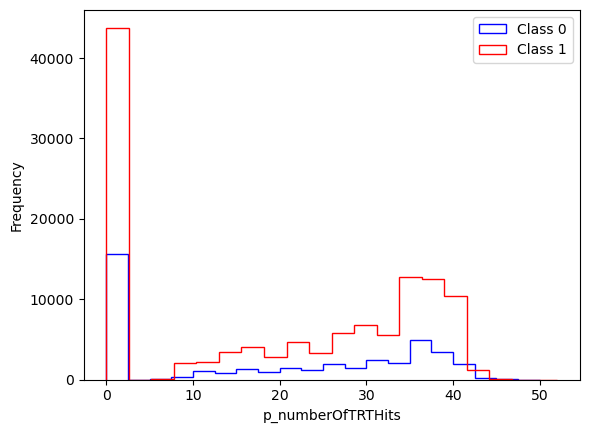

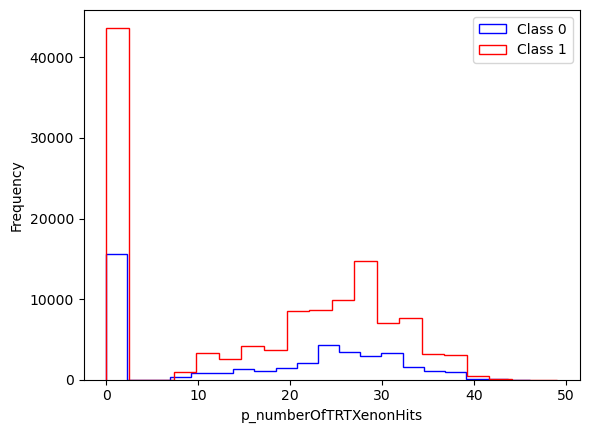

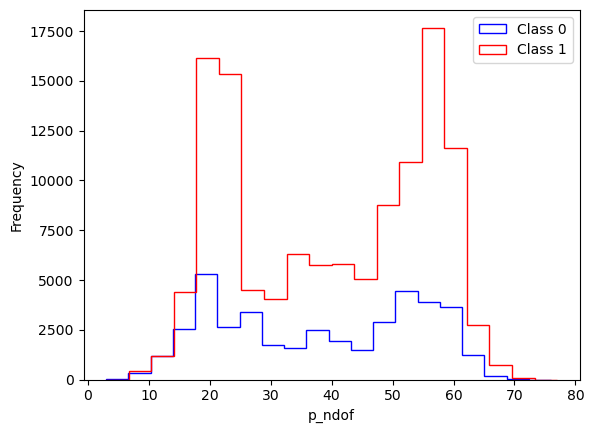

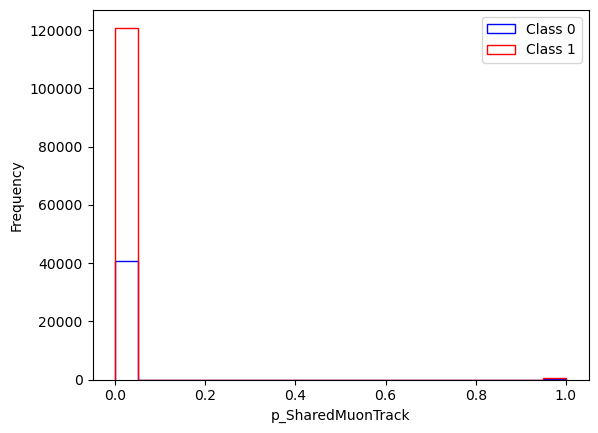

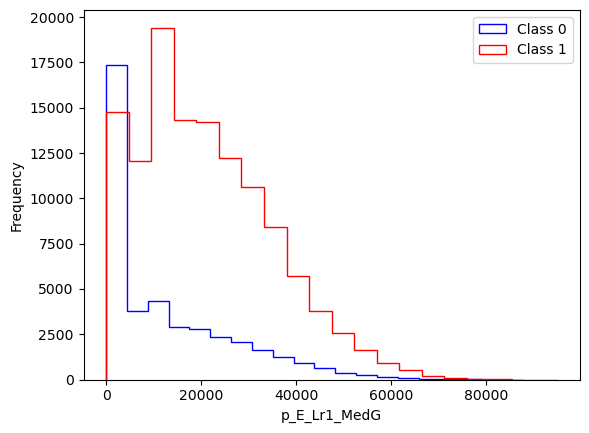

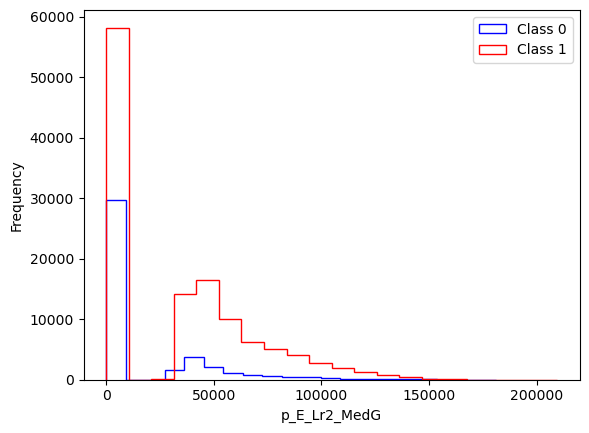

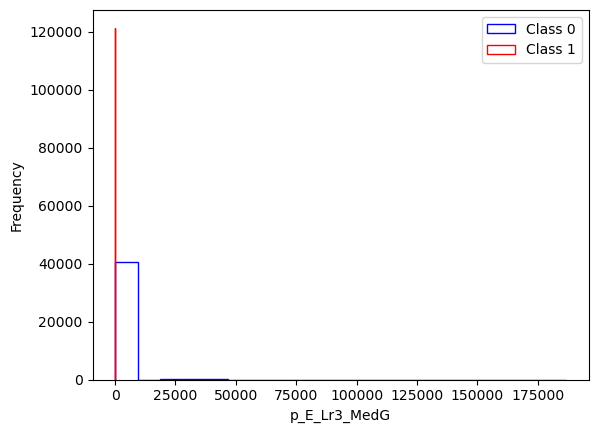

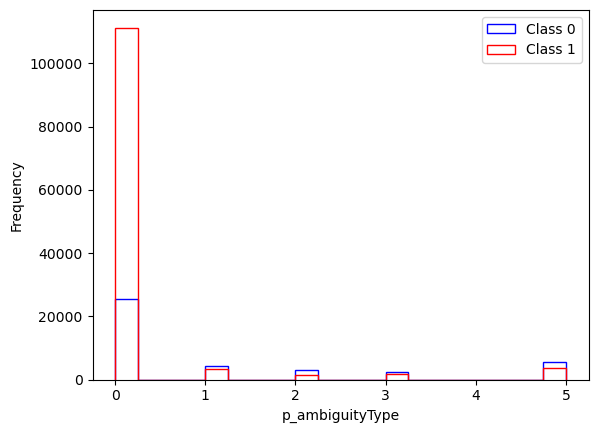

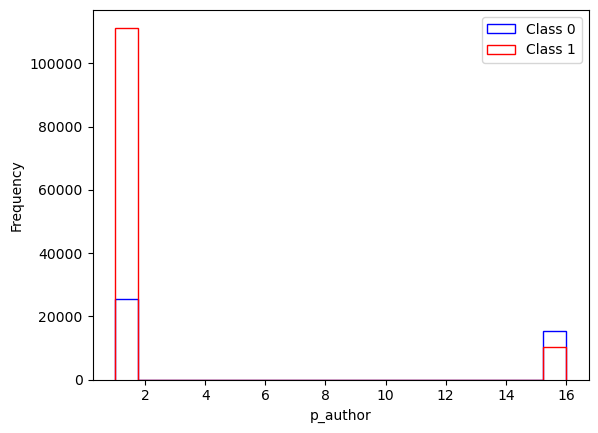

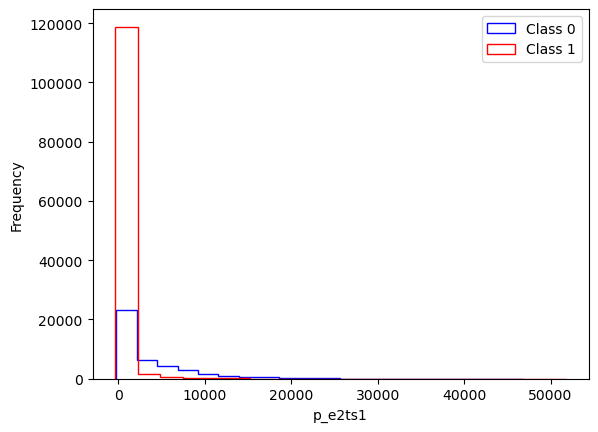

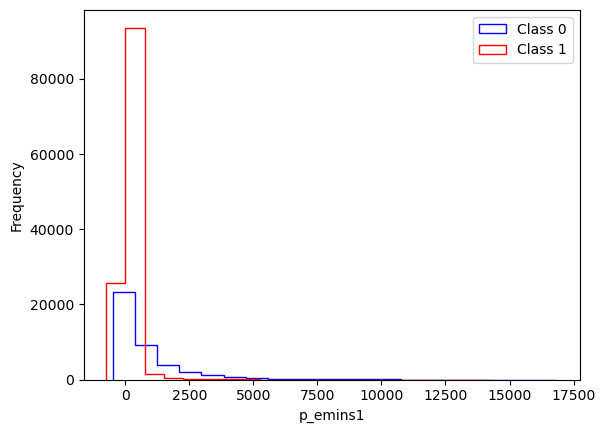

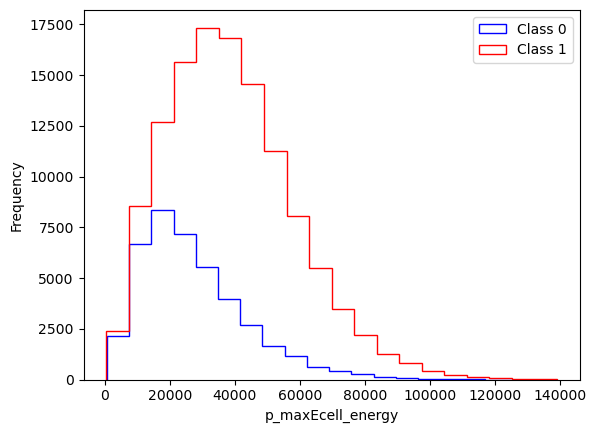

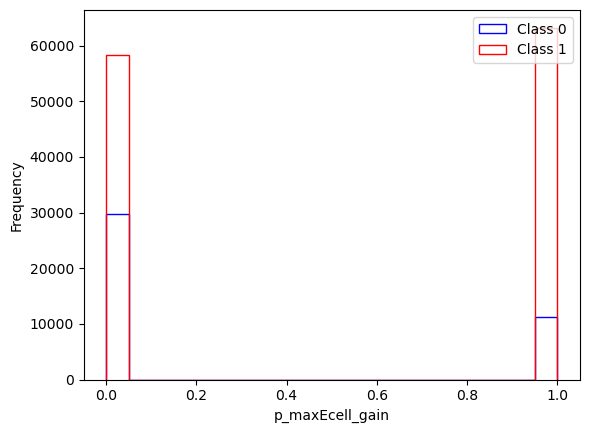

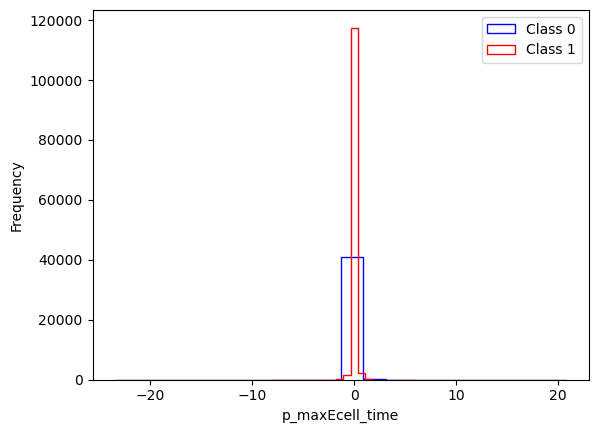

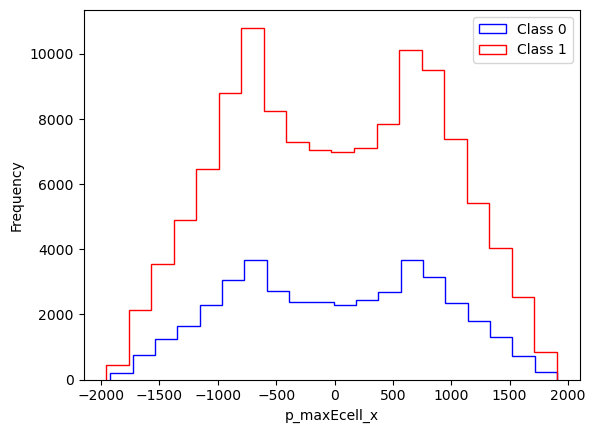

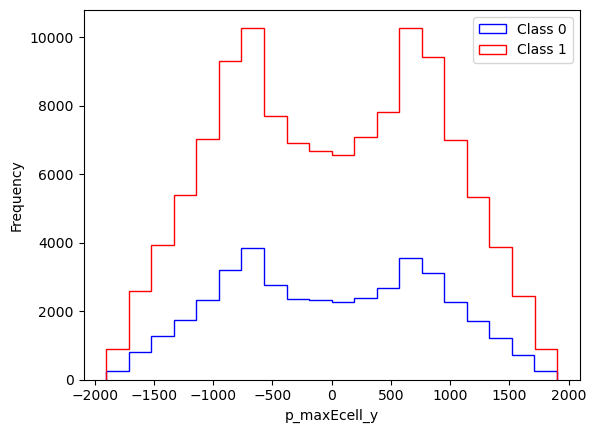

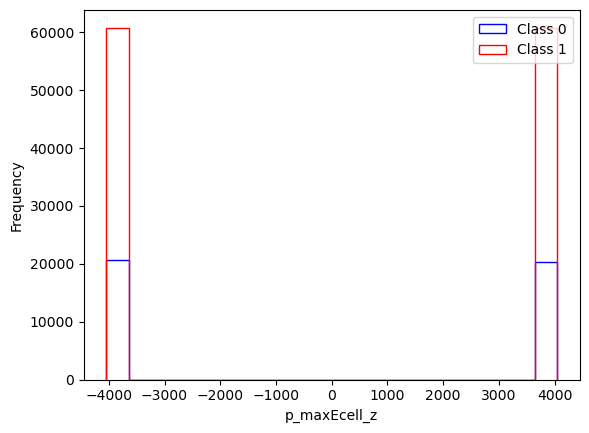

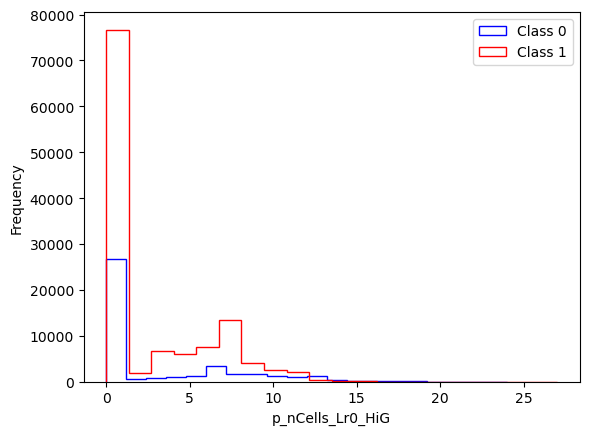

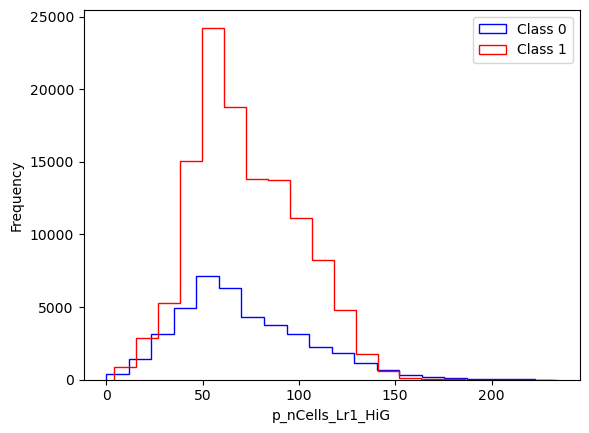

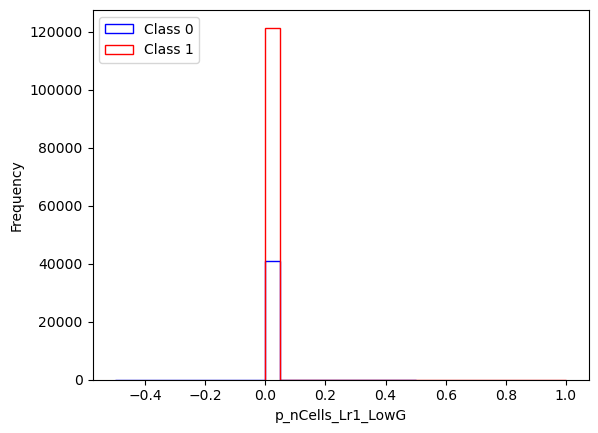

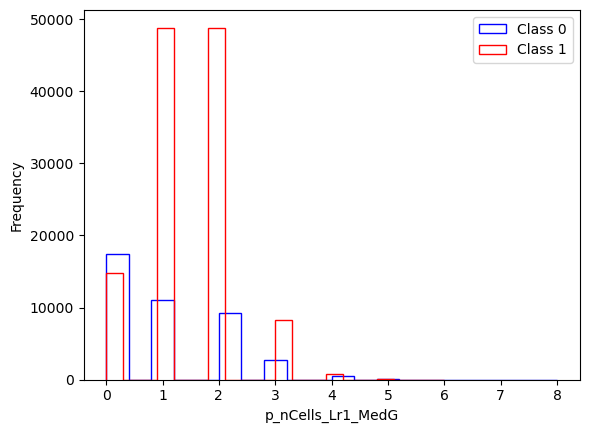

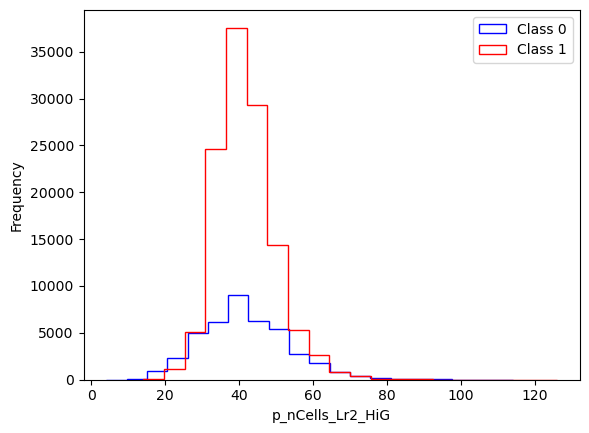

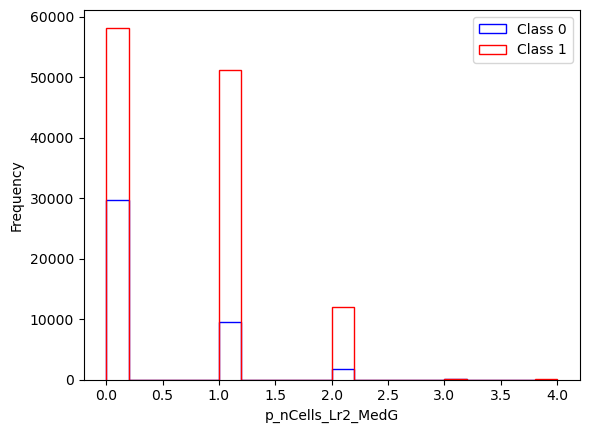

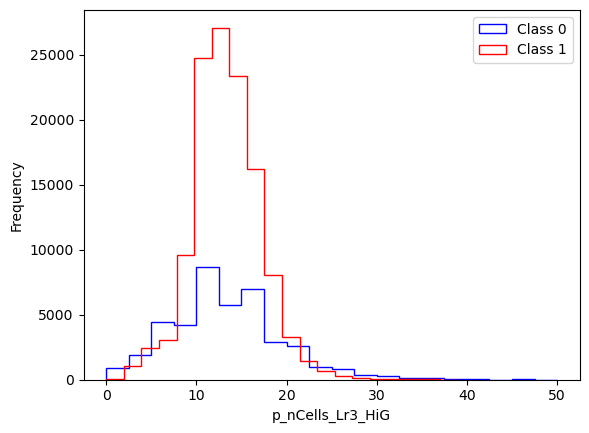

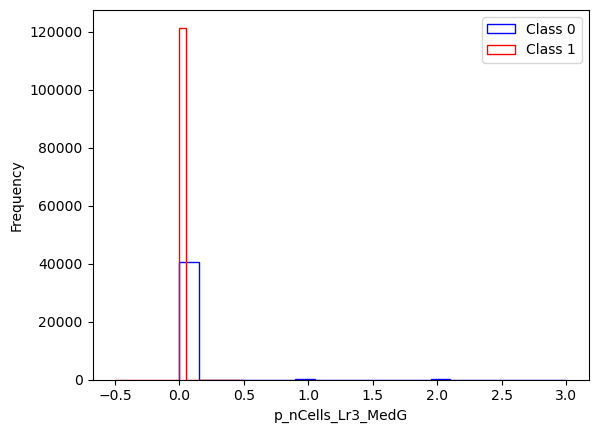

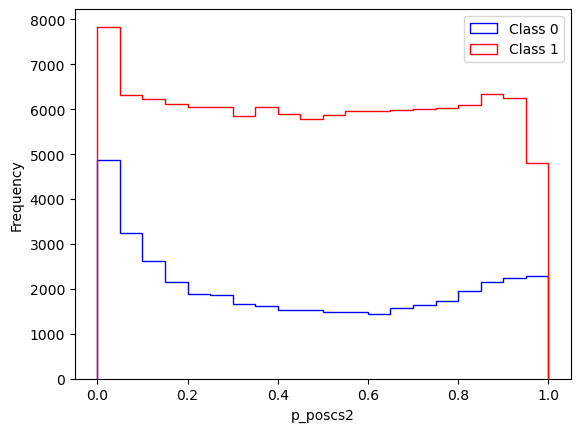

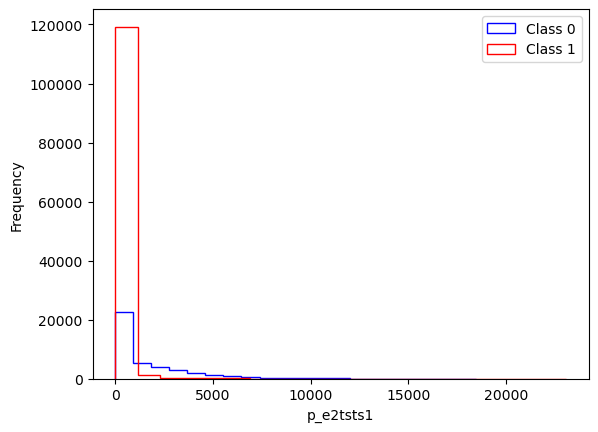

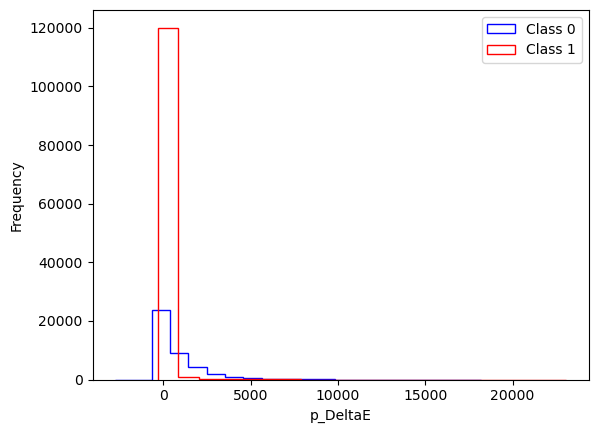

In [11]:
# set significant level
alpha=0.01

# Create a list to store the variables with p-value less than alpha
significant_variables = []

# Iterate over the chi2_results dictionary
for var, result in chi2_results.items():
    if result['p_value'] < alpha:
        significant_variables.append(var)

# Plot histograms for the significant variables against the truth variable
for var in significant_variables:
    plt.figure()
    plt.hist(train[var][y == 0], bins=20, color='blue', histtype='step',label='Class 0')
    plt.hist(train[var][y == 1], bins=20, color='red', histtype='step', label='Class 1')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [12]:
# evaluation
def evaluate(electron):
    N = [[0, 0], [0, 0]]  # Confusion matrix for counting successes/failures
    for i in np.arange(len(y)):
        if (electron[i] == 0 and y[i] == 0) : N[0][0] += 1
        if (electron[i] == 0 and y[i] == 1) : N[0][1] += 1
        if (electron[i] == 1 and y[i] == 0) : N[1][0] += 1
        if (electron[i] == 1 and y[i] == 1) : N[1][1] += 1
    fracWrong = float(N[0][1]+N[1][0])/float(len(y))
    accuracy = 1.0 - fracWrong
    return N, accuracy, fracWrong

## Selection

In [13]:
# sample selection
p_f1core=0.05
p_Reta=0.9
electron=[]
for i in np.arange(len(y)):
    if (x['p_f1core'][i]>p_f1core):electron.append(1)
    elif (x['p_Reta'][i]>p_Reta):electron.append(1)
    else : electron.append(0)

In [14]:
N, accuracy, fracWrong = evaluate(electron)
print("\nRESULT OF HUMAN ATTEMPT AT A GOOD SELECTION:")
print("  First number in parenthesis is the estimate, second is the MC truth:")
print("  True-Negative (0,0)  = ", N[0][0])
print("  False-Negative (0,1) = ", N[0][1])
print("  False-Positive (1,0) = ", N[1][0])
print("  True-Positive (1,1)  = ", N[1][1])
print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)


RESULT OF HUMAN ATTEMPT AT A GOOD SELECTION:
  First number in parenthesis is the estimate, second is the MC truth:
  True-Negative (0,0)  =  5674
  False-Negative (0,1) =  953
  False-Positive (1,0) =  35331
  True-Positive (1,1)  =  120542
    Fraction wrong            = ( (0,1) + (1,0) ) / sum =  0.22328615384615386
    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum =  0.7767138461538461


## Decision Tree Solution

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from IPython.display import SVG
from sklearn import tree

In [16]:
xx=pandas.DataFrame(x, columns=['p_pt_track','p_eClusterLr0','p_f1','p_f1core','p_fracs1','p_nTracks','p_Reta']) #variables to be chosen
yy=pandas.DataFrame(y)

In [17]:
tree_clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=25)
tree_clf.fit(xx, yy)
electron = tree_clf.predict(xx)

N, accuracy, fracWrong = evaluate(electron)
print("\nDecision Tree BJET TAG:")
print("  First number in parenthesis is the estimate, second is the MC truth:")
print("  True-Negative (0,0)  = ", N[0][0])
print("  False-Negative (0,1) = ", N[0][1])
print("  False-Positive (1,0) = ", N[1][0])
print("  True-Positive (1,1)  = ", N[1][1])
print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)


Decision Tree BJET TAG:
  First number in parenthesis is the estimate, second is the MC truth:
  True-Negative (0,0)  =  27403
  False-Negative (0,1) =  2591
  False-Positive (1,0) =  13602
  True-Positive (1,1)  =  118904
    Fraction wrong            = ( (0,1) + (1,0) ) / sum =  0.09964923076923077
    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum =  0.9003507692307693


## Using LightGBM

In [18]:
myVariables_1     = ['p_pt_track','p_eClusterLr0','p_f1','p_f1core','p_fracs1','p_nTracks','p_Reta']
myVariables_2     = ['p_E7x7_Lr3', 'p_E_Lr2_MedG', 'p_e2ts1', 'p_ethad', 'p_ehad1', 'p_E5x7_Lr3', 'p_E7x11_Lr3','p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_deltaPhiRescaled3']
input_data_1      = x[myVariables_1]
input_data_2      = x[myVariables_2]
input_data        = x[all_variables]
truth_data        = y

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from lightgbm import early_stopping
import time

start=time.time()

# Split data set into training and test set and feed these to LightGBM:
# We choose a 75:25 division here. Dataset is shuffeled before the split. 
# By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train, input_test, truth_train, truth_test = train_test_split(input_data_1, truth_data, test_size=0.25, random_state=42)
lgb_train = lgb.Dataset(input_train, truth_train)
lgb_eval  = lgb.Dataset(input_test,  truth_test, reference=lgb_train)
params = {
    'boosting_type': 'gbdt', # Traditional Gradient Boosting tree, we are combining many 'weak' learners here!
    'objective': 'binary',   # The outcome is binary, b-quark or not
    'num_leaves': 6,         # Set a maximum tree leaves to avoid overfitting
    'verbose':-1,            # Suppress some output
}

# Train the model:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

# Make predictions:
y_score = gbm.predict(input_test, num_iteration=gbm.best_iteration)  # Scores are floats in the range ]0,1[.
y_pred  = [1 if pred > 0.1 else 0 for pred in y_score]               # Classify b-quark yes or no (for comparison). 

# Print the time usage:
end = time.time()
print(f"Time used by LightGBM: {(end-start)*1000:.1f} ms")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[400]	valid_0's binary_logloss: 0.247706
Time used by LightGBM: 1186.3 ms


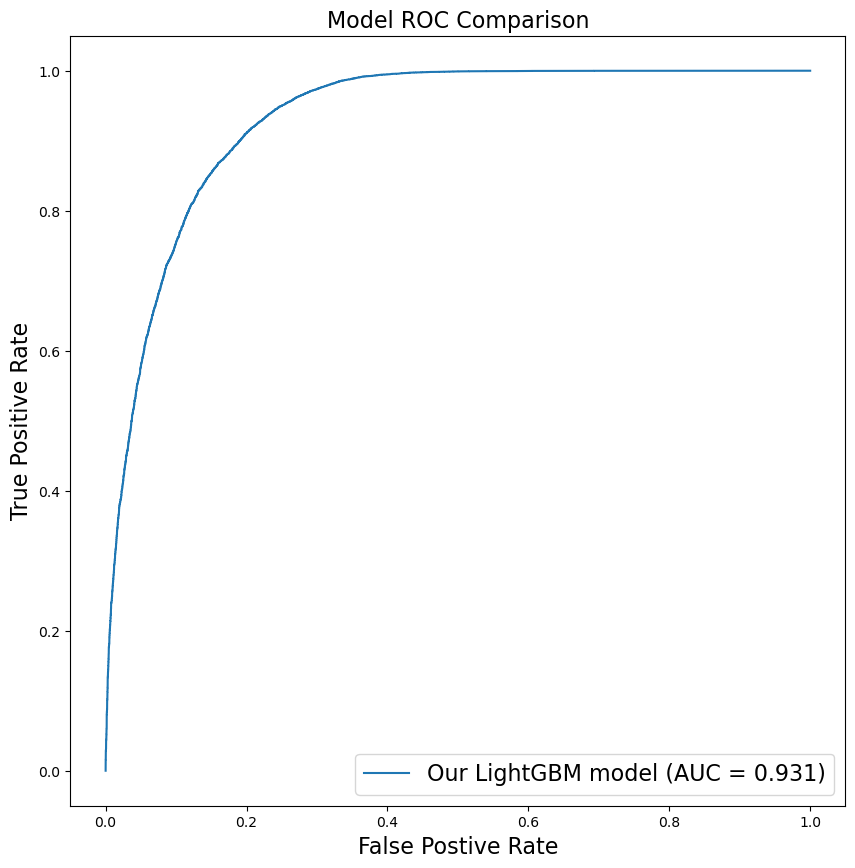

In [20]:
# Evaluate:
fpr, tpr, _ = roc_curve(truth_test, y_score)                  # False/True Positive Rate for our model
#fpr_nnbjet, tpr_nnbjet, _ = roc_curve(truth_test, benchmark_test)  # False/True Positive Rate for Aleph NNbjet

# We can now calculate the AUC scores of these ROC-curves:
auc_score = auc(fpr,tpr)                        # This is the AUC score for our model
#auc_score_nnbjet = auc(fpr_nnbjet, tpr_nnbjet)  # This is the AUC score for Aleph NNbjet

# Let's plot the ROC curves for these results:
fig = plt.figure(figsize = [10,10])
plt.title('Model ROC Comparison', size = 16)
plt.plot(fpr, tpr, label=f'Our LightGBM model (AUC = {auc_score:5.3f})')
#plt.plot(fpr_nnbjet, tpr_nnbjet, label = f'Aleph NNbjet (AUC = {auc_score_nnbjet:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)
plt.show()

In [32]:
file = open("Classification_MiaoShang_LightGBM_VariableList.txt",'w+')
for i in range(len(selected_feature_names)):
    file.write(str(selected_feature_names[i])+'\n')

## NN based solution

In [21]:
r = np.random
r.seed(42)

SavePlots = False
plt.close('all')

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

# Shift the input data to make it non-negative
input_data_shifted = input_data - np.min(input_data)

# Perform feature selection using chi2 test on the shifted data
selector = SelectKBest(chi2, k=7)  # Select the top 7 features
input_data_selected = selector.fit_transform(input_data_shifted, truth_data)
# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [all_variables[i] for i in selected_features_indices]

# Print the names of the selected features
print("Selected Feature Names:", selected_feature_names)

/Users/shangmiao/anaconda3/envs/appml/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Selected Feature Names: ['p_E7x7_Lr3', 'p_E_Lr2_MedG', 'p_e2ts1', 'p_ethad', 'p_ehad1', 'p_E5x7_Lr3', 'p_E7x11_Lr3']


In [23]:
new_data = pandas.DataFrame(input_data)
variables_to_drop = myVariables_2
input_data_dropped = input_data.drop(variables_to_drop, axis=1)
input_data_dropped_shifted = input_data_dropped - np.min(input_data_dropped)
# Perform feature selection using chi2 test on the shifted data
selector = SelectKBest(chi2, k=7)  # Select the top 7 features
input_data_dropped_selected = selector.fit_transform(input_data_dropped_shifted, truth_data)
# Get the indices of the selected features
selected_new_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_new_feature_names = [all_variables[i] for i in selected_new_features_indices]

# Print the names of the selected features
print("Selected Feature Names:", selected_new_feature_names)

/Users/shangmiao/anaconda3/envs/appml/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Selected Feature Names: ['p_eClusterLr3', 'p_E_Lr1_HiG', 'p_deltaPhiFromLastMeasurement', 'p_e235', 'p_ecore', 'p_weta1', 'p_e2tsts1']


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time

# Normalize the input data
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data_2)
start=time.time()
clf = MLPClassifier(max_iter=20000,
                    n_iter_no_change=100,           # Number of iterations without improvement before stopping
                    solver='adam',                  # Standard for minimising
                    activation='logistic',          
                    hidden_layer_sizes=(20, 20),    # Size of network 
                    learning_rate='invscaling',     
                    random_state=42)
input_train, input_test, truth_train, truth_test = train_test_split(input_data_2, truth_data, test_size=0.25, random_state=42)
clf.fit(input_train, truth_train)

# Make predictions (NOTE: This "spits out" two columns!):
y_score_MLP = clf.predict_proba(input_test)

# Print the time usage:
end = time.time()
print(f"Time used by MLPClassifier: {(end-start)*1000:.1f} ms")

Time used by MLPClassifier: 55961.7 ms


In [25]:
# Use the trained model to predict probabilities
y_score_MLP_test = clf.predict_proba(test[myVariables_2])
#print("y_score_MLP_test shape:", y_score_MLP_test.shape)

Text(0, 0.5, 'True Positive Rate')

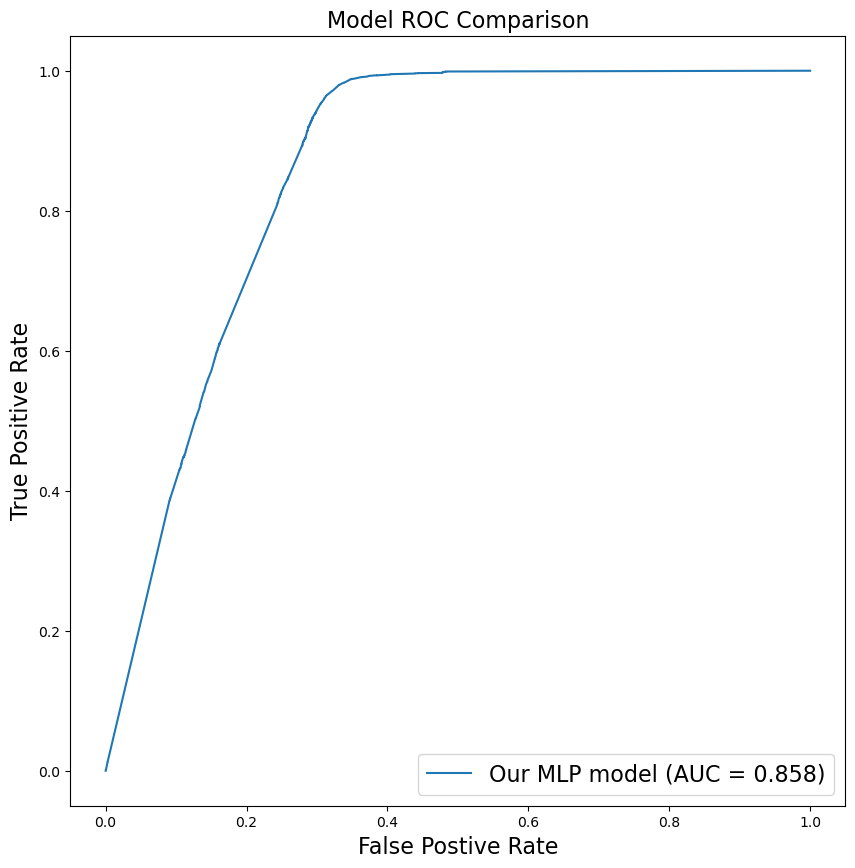

In [26]:
# Evaluate:
fpr, tpr, _ = roc_curve(truth_test,y_score_MLP[:,1])              # False/True Positive Rate for our model
# We can now calculate the AUC scores of these ROC-curves:
auc_score = auc(fpr,tpr)                        # This is the AUC score for our model

# Let's plot the ROC curves for these results:
fig = plt.figure(figsize = [10,10])
plt.title('Model ROC Comparison', size = 16)
plt.plot(fpr, tpr, label=f'Our MLP model (AUC = {auc_score:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)

In [33]:
file = open("Classification_MiaoShang_NeuralNetwork_VariableList.txt",'w+')
for i in range(len(selected_feature_names)):
    file.write(str(selected_feature_names[i])+'\n')